In [1]:
from pathlib import Path

# Get the current working directory as a Path object
current_path = Path.cwd()
home_folder = 'evan_home'

# Traverse up the directory tree until you find the target folder
for parent in [current_path] + list(current_path.parents):
    if parent.name == home_folder:
        home_path = parent
        break
else:
    raise ValueError(f"Folder '{home_folder}' not found in the current working directory.")

print("Home Path:", home_path)
source_code_dir = home_path / 'Source_code'
dataset_dir = home_path / 'Dataset'


Home Path: c:\Users\evanlee\Documents\Bmi_NAS_evan\evan_home


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [3]:
# adata = sc.read_h5ad(r"C:\Users\evanlee\Documents\Research_datasets\HCC_Lu\HCC_Lu_preprocessed_noscale.h5ad")
# adata = sc.read_h5ad('/Users/evanli/Documents/Research_datasets/HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
adata = sc.read_h5ad(dataset_dir / 'HCC_Lu/HCC_Lu_preprocessed_noscale.h5ad')
print(adata.shape)
clusters = [f"Leiden_{i}" for i in range(24)]
print(clusters)

(71915, 25712)
['Leiden_0', 'Leiden_1', 'Leiden_2', 'Leiden_3', 'Leiden_4', 'Leiden_5', 'Leiden_6', 'Leiden_7', 'Leiden_8', 'Leiden_9', 'Leiden_10', 'Leiden_11', 'Leiden_12', 'Leiden_13', 'Leiden_14', 'Leiden_15', 'Leiden_16', 'Leiden_17', 'Leiden_18', 'Leiden_19', 'Leiden_20', 'Leiden_21', 'Leiden_22', 'Leiden_23']


## Read PreLect features k3

In [4]:
# os.chdir(r"C:\Users\evanlee\Documents\GitHub\EvanPys\Progress\HCC_case_study\feature_selection_k3")
# os.chdir('/Users/evanli/Documents/EvanPys/Progress/HCC_case_study/feature_selection_k3')
os.chdir(source_code_dir / 'HCC_case_study/feature_selection_k3')

features_dict = {}
# Read features for each leiden cluster
for celltype in clusters:
    try:
        feature_df = pd.read_csv(f'{celltype}_features.txt', names=['Gene', 'Weight', 'Tendency'], sep='\t')
        feature_df['abs_weight'] = feature_df['Weight'].abs()
        feature_df = feature_df.sort_values(by=['Tendency', 'abs_weight'], ascending=[False, False])
        feature_df.drop(columns=['abs_weight'], inplace=True)
        features_dict[celltype] = feature_df
    except:
        print('skipping:', celltype)
        continue
    # print(celltype, 'Feature count:', feature_df.shape[0])
    # print(celltype, 'Positive feature count:', feature_df[feature_df['Tendency'] == 1].shape[0])
    # print('------------------')

count_df = pd.DataFrame(columns=['Feature_count', 'Positive_feature_count'])
for celltype in features_dict.keys():
    feature_df = features_dict[celltype]
    feature_count = feature_df.shape[0]
    positive_count = feature_df[feature_df['Tendency'] == 1].shape[0]
    count_df.loc[celltype] = [feature_count, positive_count]
# row_order = [f'Leiden_{i}' for i in range(24)]
# count_df = count_df.loc[row_order]
count_df

,Feature_count,Positive_feature_count
Leiden_0,41,27
Leiden_1,91,44
Leiden_2,32,13
Leiden_3,117,60
Leiden_4,34,21
Leiden_5,182,69
Leiden_6,38,21
Leiden_7,63,30
Leiden_8,99,48
Leiden_9,69,42


## Plot feature counts

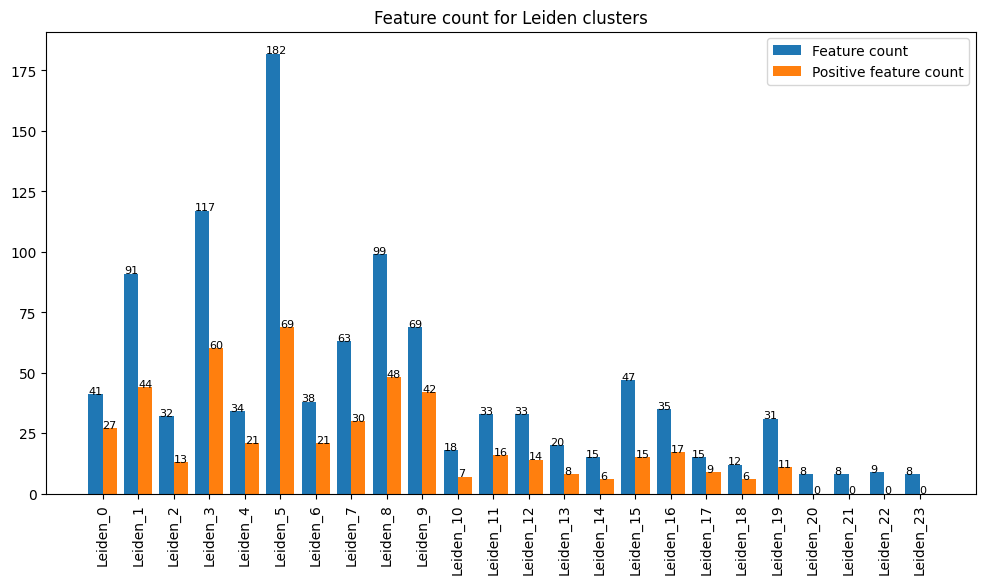

In [5]:
# plot barplot
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

ax.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.4, v, str(v), fontsize=8)
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i, v, str(v), fontsize=8)

ax.set_xticks(x)
ax.set_xticklabels(count_df.index)
plt.xticks(rotation=90)
plt.title('Feature count for Leiden clusters')
ax.legend()
plt.show()

## Plot leiden cell counts

In [7]:
adata.obs.head()

,celltype,res_3_clus,sample,site,patient,stage,virus,leiden
HCC01T_AAACCTGAGGGCATGT,T/NK,13,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGAGTCGCCGT,Myeloid,16,HCC01T,Tumor,HCC01,I,HBV,Leiden_3
HCC01T_AAACCTGCATTACCTT,T/NK,25,HCC01T,Tumor,HCC01,I,HBV,Leiden_5
HCC01T_AAACCTGGTCACACGC,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1
HCC01T_AAACCTGTCCAGTATG,T/NK,2,HCC01T,Tumor,HCC01,I,HBV,Leiden_1


In [8]:
cell_counts = adata.obs['leiden'].value_counts()
cell_counts

leiden
Leiden_0     11758
Leiden_1     10188
Leiden_2      9742
Leiden_3      5660
Leiden_4      5021
Leiden_5      4740
Leiden_6      3858
Leiden_7      3815
Leiden_8      2920
Leiden_9      2881
Leiden_10     2220
Leiden_11     2103
Leiden_12     1641
Leiden_13     1495
Leiden_14     1065
Leiden_15      946
Leiden_16      599
Leiden_17      367
Leiden_18      321
Leiden_19      260
Leiden_20      182
Leiden_21      107
Leiden_22       19
Leiden_23        7
Name: count, dtype: int64

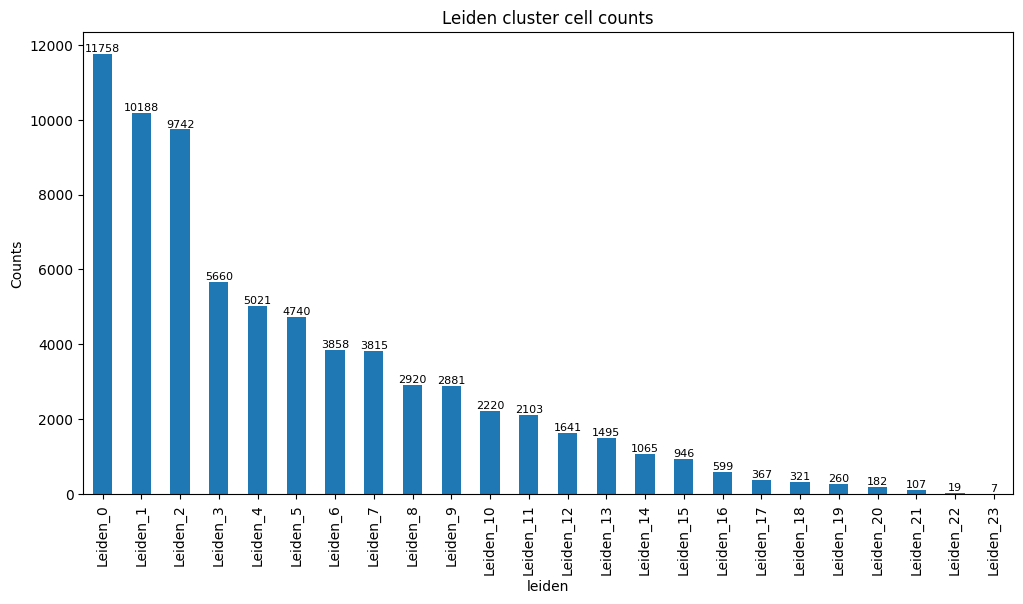

In [9]:
# plt.figure(figsize=(12, 6))
# cell_counts.plot(kind='bar')
# plt.title('Leiden cluster cell counts')
# plt.ylabel('Counts')
# plt.show()

plt.figure(figsize=(12, 6))
ax = cell_counts.plot(kind='bar')

# add counts on top of bar
for i, value in enumerate(cell_counts):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=8)
plt.title('Leiden cluster cell counts')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

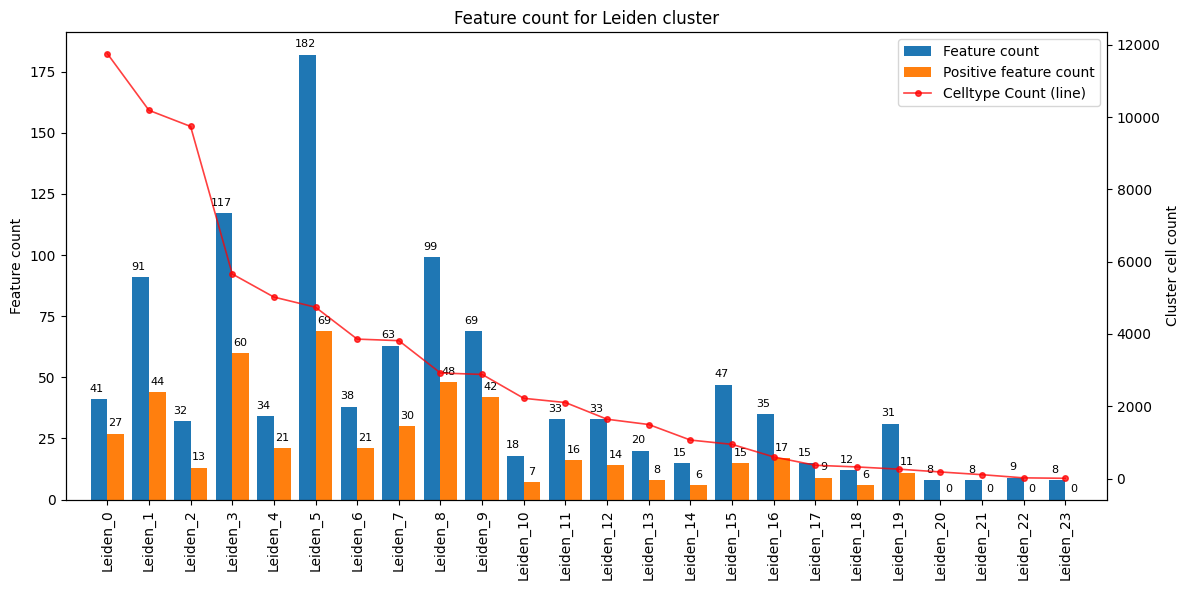

In [10]:
# count_df = count_df.sort_values('Feature_count', ascending=False)
# # cell type counts series, align index with count_df
# counts_aligned = counts.reindex(count_df_k3.index)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))
x = np.arange(len(count_df.index))
bar_width = 0.4

# ax1: Bar plot for feature counts and positive feature counts
ax1.bar(x - bar_width/2, count_df['Feature_count'], bar_width, label='Feature count')
ax1.bar(x + bar_width/2, count_df['Positive_feature_count'], bar_width, label='Positive feature count')
ax1.set_ylabel('Feature count')
ax1.set_xlim(-1, len(count_df.index))

# Add the values to each bar
for i, v in enumerate(count_df['Feature_count']):
    plt.text(i-0.25, v+3, str(v), fontsize=8, ha='center')  # i-0.4
for i, v in enumerate(count_df['Positive_feature_count']):
    plt.text(i+0.2, v+3, str(v), fontsize=8, ha='center')   # i+0

# Add a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(x, cell_counts, color='red', marker='o', label='Celltype Count (line)', 
         markersize=4, alpha=0.75, linewidth=1.2)
ax2.set_ylabel('Cluster cell count')

# Customize x-axis and title
ax1.set_xticks(x)
ax1.set_xticklabels(count_df.index, rotation=90)
ax1.set_title('Feature count for Leiden cluster')

# Combine legends from both axes
handle, labels = ax1.get_legend_handles_labels()
handle2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handle + handle2, labels + labels2, loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()